# WAR + Luck = Actual Record 
Alan Kessler (Prepared for weekly discussion for MSPA 400)

I read an [article](http://www.fangraphs.com/blogs/does-projected-team-war-actually-mean-anything/) by Jeff Sullivan in FanGraphs, one of the leading online sabermetrics publications, looking at how well projected wins above replacement (WAR) predicts actual WAR. Wins above replacement is a baseball statistic aimed at measuring overall performance for a player. In this article, Sullivan is working with the statistic aggregated to a team level.

Sullivan uses a least squares regression line to come to the conclusion that projected WAR is predictive of actual WAR but not all of the variance is explained. The R-squared value he calculates is 0.48, indicating a strong correlation but certainly not a one to one relationship. The author asserts that the projected values do not consider injuries or trades which would explain some of the variance.

Sullivan notes that there is additional uncertainty in the relationship between actual WAR and the number of wins in the season. To a certain extent, sports have a luck component such that no statistic could predict with 100% certainty. To demonstrate this, Sullivan plots wins against actual WAR from 2002-2014 and fits a least squares line to model the relationship between the two variables. The resulting R-squared is 0.78, showing a strong relationship between the statistic and the observed outcome. 

Unfortunately, the first analysis in the article uses data no longer available on the FanGraphs website. However, I am able to replicate the analysis used to compare actual wins to WAR. The chart I created is included below. I get a similar result to Sullivan with a 0.7996 R-squared. Possible reasons for the difference includes the fact that teams names have changed over time and I cannot confirm that Sullivan used the same procedure to clean the data. Additionally, the calculation of WAR changes as well. We may not being using the exact same WAR data.  

### References

Sullivan, J. (2014, December 18). Does Projected Team WAR Actually Mean Anything? Retrieved June 22, 2017, from http://www.fangraphs.com/blogs/does-projected-team-war-actually-mean-anything/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [3]:
# Import data downloaded from FanGraphs team level leaderboards (2002-2014)
batting = pd.read_csv('batting.csv', header=0, index_col=['Season','Team'], 
                      usecols=['Season', 'Team', 'WAR'])
batting.columns = ['batter_WAR'] 
pitching = pd.read_csv('pitching.csv', header=0, index_col=['Season','Team'], 
                      usecols=['Season', 'Team', 'WAR'])
pitching.columns = ['pitcher_WAR'] 

In [4]:
# Join batting and pitching data
total = batting.join(pitching)

In [5]:
# Calculate total WAR
total['WAR'] = total['batter_WAR'] + total['pitcher_WAR']

In [6]:
# Import standings from modified Lahman Database (http://www.seanlahman.com/baseball-archive/statistics/)
standings = pd.read_csv('standings.csv', header=0, index_col = ['FullName'])

In [7]:
# Import team name translations to join to fangraphs
teams = pd.read_csv('teamnames.csv', header=0, index_col = ['FullName'])

In [8]:
# Join names together to create wins data
wins = standings.join(teams).reset_index().set_index(['Season','Team'])

In [9]:
# Create final data by merging wins and WAR
final = total.join(wins)

In [10]:
# Fit a least squares line
x = final['WAR'].values
y = final['Wins'].values
slope, intercept = np.polyfit(x, y, 1)

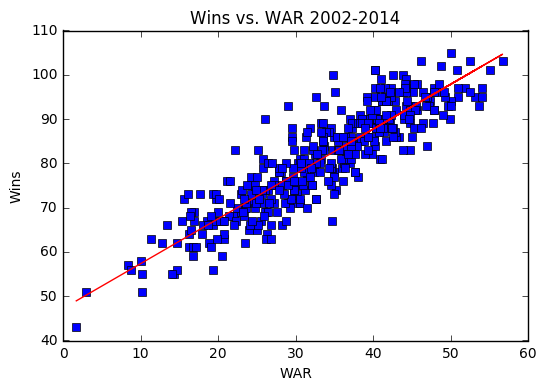

In [11]:
# Scatter plot of the various points and a least-squares fit line
plt.plot(x, y, 'bs',label='Team Results')
plt.plot(x, slope*x + intercept, 'r-',label='Least-squares Fit Line')
plt.xlabel('WAR')
plt.ylabel('Wins')
plt.title('Wins vs. WAR 2002-2014')
plt.show()

In [12]:
# Calculate R-squared and compare to Sullivan's article (0.78)
slopeS, interceptS, r_value, p_value, std_err = scipy.stats.linregress(x, y)
print(round(r_value**2, 4))

0.7996
